#Statement: Analyze the cardiovascular disease on the basis of patients condition or habits


##This code designed to analyze, preprocess, and visualize data related to cardiovascular disease (CVD) using Python libraries.
##numpy: Provides support for numerical computations.
##pandas: Handles data manipulation and analysis, particularly for structured data.
##matplotlib.pyplot: Used for generating basic visualizations.
##seaborn: Provides enhanced statistical graphics.
#sklearn:


##SimpleImputer: Handles missing data imputation.
##LabelEncoder: Converts categorical data into numerical format.
##StandardScaler: Normalizes feature values for better model performance.
##train_test_split: Splits data into training and testing sets.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
data=pd.read_csv('/content/CVD_cleaned.csv')
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


## data.info(), which provides an overview of the structure and attributes of your dataset.
##The data.info() method is used to get a concise summary of a pandas DataFrame. It helps identify:

##Column names
##Data types
##Non-null values (missing data)
##Memory usage of the DataFrame


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

## The data.describe() method summarizes the central tendency, dispersion, and shape of the distribution for numerical columns in a pandas DataFrame. It is useful for identifying outliers, understanding ranges, and getting an overall sense of the dataset.

#For numerical columns (int64 or float64):

## Count: Number of non-missing values in each column.
## Mean: Average value of the column.
## Std (Standard Deviation): Measure of spread or variability in the data.
##Min: Minimum value in the column.
##25% (1st Quartile): Value below which 25% of the data lies.
##50% (Median): Middle value of the column.
##75% (3rd Quartile): Value below which 75% of the data lies.
##Max: Maximum value in the column.

In [ ]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## The data.isnull().sum() method is used to count the total number of missing (null) values in each column of a pandas DataFrame.
#Column Names: Names of all columns in the dataset.
#Missing Values: Number of missing values (NaN) in each column.

In [ ]:
data.isnull().sum()

,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


##This code is designed to preprocess categorical columns in the dataset by converting them into numeric format using LabelEncoder.
#Target Columns:

##Categorical columns being transformed:["General_Health", "Other_Cancer", "Depression", "Diabetes", "Arthritis", "Sex", "Age_Category", "Smoking_History"].

#Encoding Process:A LabelEncoder is created for each column in the categorical_columns list.Each column is replaced with its corresponding numeric encoding, where:Unique values in the column are assigned integers starting from 0.Example:Male → 0, Female → 1 for the Sex column.Storage:

#A dictionary, label_encoders, stores the LabelEncoder objects for each column. This allows easy access for inverse transformations if needed (e.g., converting numeric values back to original categories).



In [ ]:
categorical_columns = ["General_Health", "Other_Cancer", "Depression", "Diabetes", "Arthritis", "Sex", "Age_Category", "Smoking_History"]
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,Within the past 2 years,No,No,No,0,0,0,1,1,10,150,32.66,14.54,1,0,30,16,12
1,5,Within the past year,No,Yes,No,0,0,2,0,1,10,165,77.11,28.29,0,0,30,0,4
2,5,Within the past year,Yes,No,No,0,0,2,0,1,8,163,88.45,33.47,0,4,12,3,16
3,4,Within the past year,Yes,Yes,No,0,0,2,0,3,11,180,93.44,28.73,0,0,30,30,8
4,2,Within the past year,No,No,No,0,0,0,0,3,12,191,88.45,24.37,1,0,8,4,0


##Automatically extracts all columns with a data type of object from the dataset.
##This is helpful for dynamically identifying categorical features without manually specifying them.

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:\n", categorical_columns)


Categorical columns:
 Index(['Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer'], dtype='object')


## This code dynamically applies label encoding to all identified categorical columns in a dataset. It converts categorical values into numeric representations that can be processed by machine learning models.

In [ ]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le  # Save the encoder for future reference
    print(f"Column '{col}' encoded.")

Column 'Checkup' encoded.
Column 'Exercise' encoded.
Column 'Heart_Disease' encoded.
Column 'Skin_Cancer' encoded.


In [ ]:
print("\nMissing values before handling:\n", data.isnull().sum())



Missing values before handling:
 General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


## The code dynamically extracts all numeric columns (of types float64 and int64) from the dataset. This is useful for operations like scaling, normalization, or statistical analysis.

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

## The code snippet fills missing values (NaN) in numeric columns by replacing them with the median value of each column. This is particularly useful for handling outliers, as the median is less sensitive to extreme values compared to the mean.

In [ ]:
imputer = SimpleImputer(strategy='median')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Dataset Overview

## The dataset, data, appears to be a pandas DataFrame that you're analyzing.
##The corr() method calculates the Pearson correlation coefficients between numerical columns in the dataset.
#Key Features:

##Heatmap: A visual representation of the correlation matrix, where colors represent the strength of correlation.
##Annotations: Each cell in the heatmap displays the correlation coefficient for the pair of features it represents.
##Color Map (coolwarm): This color map is used to represent negative correlations in blue and positive correlations in red.

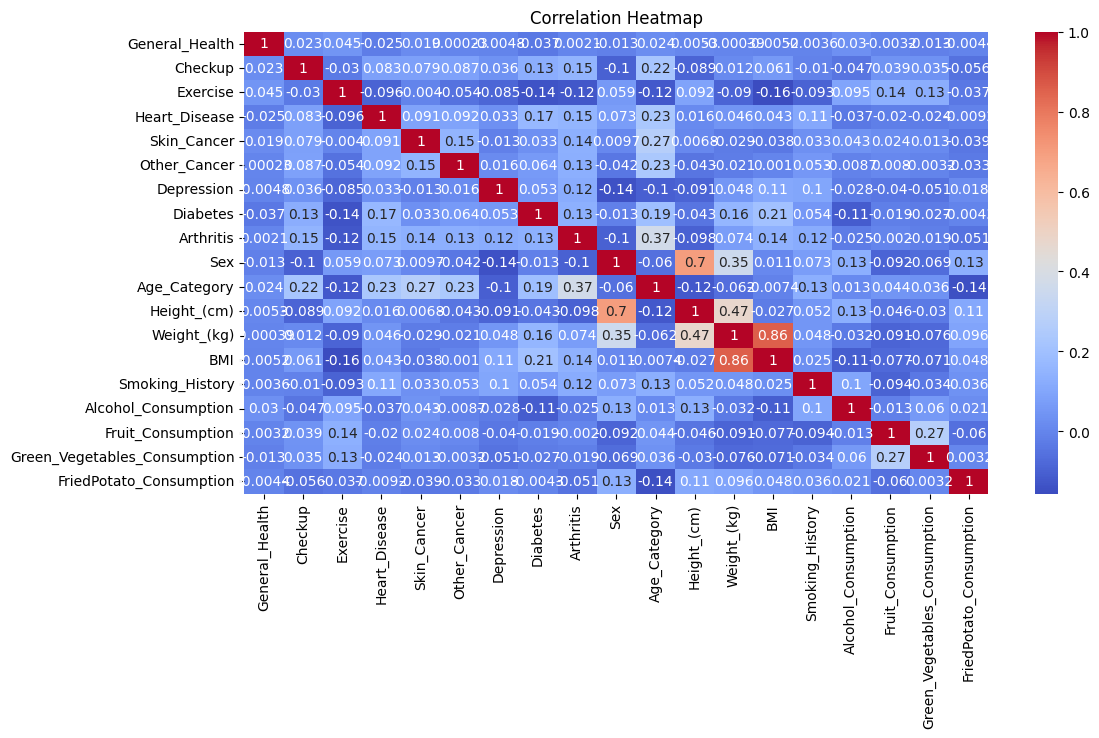

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Dataset Overview:

##The data DataFrame likely contains at least two columns: "Sex" and "BMI".
##"Sex" is expected to represent the gender of the individuals (typically values like "Male" and "Female").
##"BMI" represents the Body Mass Index of individuals.
#Key Features:

##Boxplot: This plot shows the distribution of BMI for each gender category ("Male" vs "Female") in the dataset.
##X-axis ("Sex"): Represents the two categories of sex (or gender).
##Y-axis ("BMI"): Represents the BMI values.
##Box: The box represents the interquartile range (IQR), with the median BMI as the line inside the box.
##Whiskers: Extend to the minimum and maximum values that are within 1.5 times the IQR from the first and third quartiles.
##Outliers: Data points that fall outside of the whiskers are considered outliers and typically shown as dots.

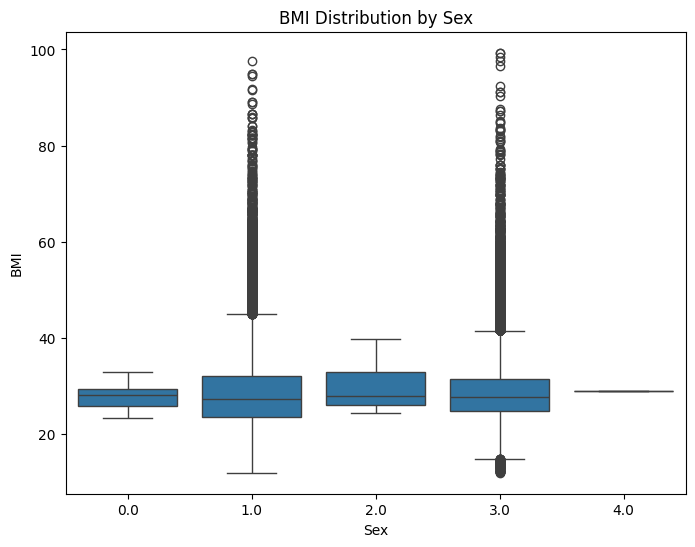

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="BMI", data=data)
plt.title("BMI Distribution by Sex")
plt.show()

# Dataset Overview:

## The data DataFrame likely includes a column called "Age_Category", which categorizes individuals into different age groups.
## The exact age categories might depend on the dataset but typically could be something like "18-24", "25-34", "35-44", etc.
# Key Features:

## Countplot: This plot is used to display the count of observations in each categorical bin (in this case, each age category).
## X-axis ("Age_Category"): Represents the different age groups.
## Y-axis: Shows the number of individuals in each age category.
## Bars: Each bar's height represents the number of occurrences of a specific age category.


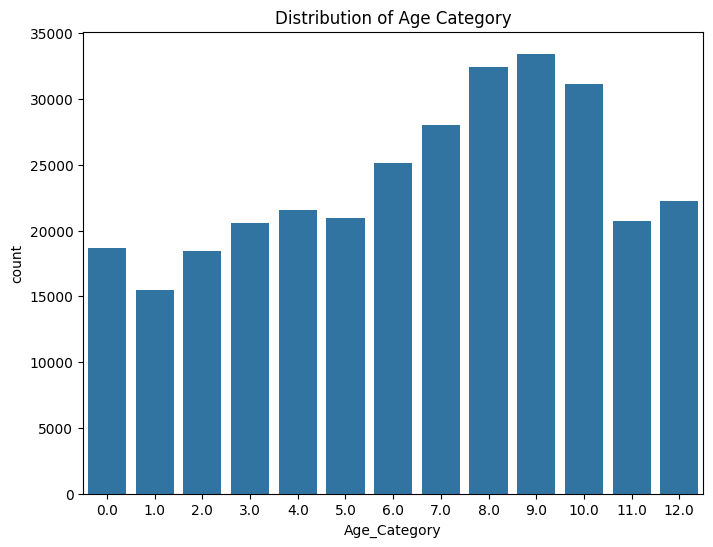

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Age_Category", data=data)
plt.title("Distribution of Age Category")
plt.show()


# Dataset Overview:

## data: A pandas DataFrame containing various columns, with "BMI" being the target variable you're trying to predict.
## "BMI": This is the target variable that you aim to predict using the other columns in the dataset.
# Feature Variables (X):

## X contains all the columns from the original dataset except "BMI". These are the features that will be used to predict the target variable.
## The features might include demographic or medical attributes like "Age", "Sex", "Height", "Weight", or other factors depending on the dataset.
# Target Variable (y):

## y is the "BMI" column, which is the variable you're trying to predict using machine learning algorithms.

In [ ]:
X = data.drop("BMI", axis=1)
y = data["BMI"]

# Dataset Overview:

## X: Contains the feature variables (all columns except "BMI").
## y: Contains the target variable ("BMI").
# Data Splitting:

## Training Set (X_train, y_train): This is the subset of the data used to train machine learning models. It consists of 80% of the original dataset (since test_size=0.2).
## X_train: Features for the training set.
## y_train: Target variable for the training set.
## Testing Set (X_test, y_test): This is the subset of the data used to evaluate the performance of the model. It consists of 20% of the original dataset.
## X_test: Features for the testing set.
## y_test: Target variable for the testing set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
print("\nData Preprocessing Complete. Ready for Modeling!")


Data Preprocessing Complete. Ready for Modeling!
